#Driver Behaviour Analysis
DS203 Course Project

-by-

Shiven Barbare(190100110)

Akash Chodankar(190100009)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_acc_NM = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D1/20151111123124-25km-D1-NORMAL-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
data_acc_AM = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D1/20151111125233-24km-D1-AGGRESSIVE-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
data_acc_DM = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D1/20151111132348-25km-D1-DROWSY-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")

In [ ]:
data_acc_NM = data_acc_NM.drop([11], axis=1)
data_acc_AM = data_acc_AM.drop([11], axis=1)
data_acc_DM = data_acc_DM.drop([11], axis=1)

In [ ]:
data_acc_NM.columns=['timestamp','system_activated','accn_x','accn_y','accn_z','accn_kf_x','accn_kf_y','accn_kf_z','roll','pitch','yaw']
data_acc_AM.columns=['timestamp','system_activated','accn_x','accn_y','accn_z','accn_kf_x','accn_kf_y','accn_kf_z','roll','pitch','yaw']
data_acc_DM.columns=['timestamp','system_activated','accn_x','accn_y','accn_z','accn_kf_x','accn_kf_y','accn_kf_z','roll','pitch','yaw']

In [ ]:
data_acc_NM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8668 entries, 0 to 8667
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         8668 non-null   float64
 1   system_activated  8668 non-null   int64  
 2   accn_x            8668 non-null   float64
 3   accn_y            8668 non-null   float64
 4   accn_z            8668 non-null   float64
 5   accn_kf_x         8668 non-null   float64
 6   accn_kf_y         8668 non-null   float64
 7   accn_kf_z         8668 non-null   float64
 8   roll              8668 non-null   float64
 9   pitch             8668 non-null   float64
 10  yaw               8668 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 745.0 KB


### Preparing data for predictions

#### We drop the following columns based on our previous analysis.

In [ ]:
data_acc_NM = data_acc_NM.drop(['accn_x','accn_y','accn_z', 'timestamp'],1)
data_acc_AM = data_acc_AM.drop(['accn_x','accn_y','accn_z', 'timestamp'],1)
data_acc_DM = data_acc_DM.drop(['accn_x','accn_y','accn_z', 'timestamp'],1)

In [ ]:
data_acc_NM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8668 entries, 0 to 8667
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   system_activated  8668 non-null   int64  
 1   accn_kf_x         8668 non-null   float64
 2   accn_kf_y         8668 non-null   float64
 3   accn_kf_z         8668 non-null   float64
 4   roll              8668 non-null   float64
 5   pitch             8668 non-null   float64
 6   yaw               8668 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 474.2 KB


####Setting labels
1. Normal - 0
2. Aggresive - 1
3. Drowsy - 2

In [ ]:
data_acc_NM['predict'] = 0
data_acc_AM['predict'] = 1
data_acc_DM['predict'] = 2

In [ ]:
data_acc_NM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8668 entries, 0 to 8667
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   system_activated  8668 non-null   int64  
 1   accn_kf_x         8668 non-null   float64
 2   accn_kf_y         8668 non-null   float64
 3   accn_kf_z         8668 non-null   float64
 4   roll              8668 non-null   float64
 5   pitch             8668 non-null   float64
 6   yaw               8668 non-null   float64
 7   predict           8668 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 541.9 KB


#### Merging dataframes to make the dataset for prediction

In [ ]:
data = pd.concat([data_acc_NM, data_acc_AM, data_acc_DM])

#### The merged dataframe
1. Contains 8 variables.
2. Contains 25366 rows.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25366 entries, 0 to 9410
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   system_activated  25366 non-null  int64  
 1   accn_kf_x         25366 non-null  float64
 2   accn_kf_y         25366 non-null  float64
 3   accn_kf_z         25366 non-null  float64
 4   roll              25366 non-null  float64
 5   pitch             25366 non-null  float64
 6   yaw               25366 non-null  float64
 7   predict           25366 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.7 MB


#### Distribution of output class using barplot

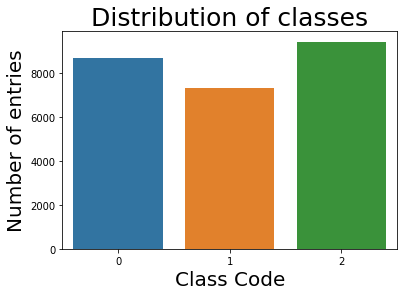

In [ ]:
sns.countplot(x = data['predict'])
plt.xlabel('Class Code', size = 20)
plt.ylabel('Number of entries', size = 20);
plt.title('Distribution of classes',size=25)
plt.show()

#### Importing Sklearn modules for Machine learning and predictions

In [ ]:
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#### Seperating the labels from the features

In [ ]:
#features
X = data.drop('predict', 1)

#labels
Y = data['predict']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25366 entries, 0 to 9410
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   system_activated  25366 non-null  int64  
 1   accn_kf_x         25366 non-null  float64
 2   accn_kf_y         25366 non-null  float64
 3   accn_kf_z         25366 non-null  float64
 4   roll              25366 non-null  float64
 5   pitch             25366 non-null  float64
 6   yaw               25366 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.2 MB


#### Standardising the data before training the models
This is to ensure better convergence

In [ ]:
print('Before standardising \n', X)
print('-x'*50)

sc = StandardScaler()
X = sc.fit_transform(X)

print('After standardising\n', X)

Before standardising 
       system_activated  accn_kf_x  accn_kf_y  accn_kf_z   roll  pitch    yaw
0                    0      0.012      0.022      0.006 -1.487 -0.223 -0.373
1                    0      0.049      0.088      0.028 -1.652 -0.248 -0.415
2                    0      0.070      0.126      0.041 -1.652 -0.248 -0.415
3                    0      0.078      0.141      0.046 -1.652 -0.248 -0.415
4                    0      0.081      0.147      0.048 -1.652 -0.248 -0.415
...                ...        ...        ...        ...    ...    ...    ...
9406                 1     -0.005     -0.047      0.015 -1.549 -0.007  2.771
9407                 1     -0.000     -0.035      0.012 -1.550 -0.004  2.772
9408                 1     -0.014     -0.029      0.011 -1.550 -0.001  2.774
9409                 1     -0.019     -0.025      0.014 -1.551 -0.000  2.775
9410                 1     -0.023     -0.024      0.011 -1.552  0.002  2.776

[25366 rows x 7 columns]
-x-x-x-x-x-x-x-x-x-x-x-x-x-

#### Spliting the dataset into training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y.to_numpy(), test_size = 0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20292, 7)
(5074, 7)
(20292,)
(5074,)


#### Logistic Regression

In [ ]:
#Initializing model
log_reg = LogisticRegression(C = 0.1)

#Training
log_reg.fit(x_train, y_train)

#Prediction
y_pred_log_reg = log_reg.predict(x_test)

#Classification report
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1742
           1       0.44      0.28      0.34      1474
           2       0.49      0.61      0.55      1858

    accuracy                           0.49      5074
   macro avg       0.48      0.47      0.47      5074
weighted avg       0.48      0.49      0.48      5074



#### Support Vector Classifier - SVC

In [ ]:
#Initializing model
svc = SVC()

#Training
svc.fit(x_train, y_train)

#Prediction
y_pred_svc = svc.predict(x_test)

#Classification report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1742
           1       0.83      0.73      0.78      1474
           2       0.72      0.76      0.74      1858

    accuracy                           0.79      5074
   macro avg       0.80      0.79      0.79      5074
weighted avg       0.80      0.79      0.79      5074



#### Random Forest - RF

In [ ]:
rf = RandomForestClassifier(n_estimators=50) 

#Training
rf.fit(x_train, y_train)

#Prediction
y_pred_rf = rf.predict(x_test)

#Classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1742
           1       0.99      1.00      1.00      1474
           2       1.00      0.99      0.99      1858

    accuracy                           0.99      5074
   macro avg       0.99      0.99      0.99      5074
weighted avg       0.99      0.99      0.99      5074



#### K Nearest Neighbours - KNN

In [ ]:
#Initializing model
knn = KNeighborsClassifier(n_neighbors = 3) 

#Training
knn.fit(x_train, y_train)

#Prediction
y_pred_knn = knn.predict(x_test)

#Classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1742
           1       0.90      0.85      0.88      1474
           2       0.86      0.87      0.87      1858

    accuracy                           0.89      5074
   macro avg       0.89      0.89      0.89      5074
weighted avg       0.89      0.89      0.89      5074



In [ ]:
#Initializing model
mlp = MLPClassifier()

#Training
mlp.fit(x_train, y_train)

#Prediction
y_pred_mlp = mlp.predict(x_test)

#Classification report
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1742
           1       1.00      0.99      0.99      1474
           2       0.98      0.98      0.98      1858

    accuracy                           0.99      5074
   macro avg       0.99      0.99      0.99      5074
weighted avg       0.99      0.99      0.99      5074



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### Summary of accuracies of all models

In [ ]:
print(f'For Logistic Regression')
print(accuracy_score(y_test, y_pred_log_reg))

print(f'\nFor Support Vector Classifier')
print(accuracy_score(y_test, y_pred_svc))

print(f'\nFor Random Forest Classifier')
print(accuracy_score(y_test, y_pred_rf))

print(f'\nFor K Nearest Neigbours')
print(accuracy_score(y_test, y_pred_knn))

print(f'\nFor Multilayer Perceptron Classifier')
print(accuracy_score(y_test, y_pred_mlp))

For Logistic Regression
0.48640126133228223

For Support Vector Classifier
0.7938510051241624

For Random Forest Classifier
0.9940875049270792

For K Nearest Neigbours
0.8939692550256209

For Multilayer Perceptron Classifier
0.9877808435159637


### Predictions after combining data for all 6 drivers

#### Array to store the data for individual drivers

In [ ]:
Norm = []
Agggre = []
Drow = []

#### Sequentially reading all the data files

**For Normal Motorway**

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D1/20151111123124-25km-D1-NORMAL-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Norm.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/UAH-DRIVESET-v1/D2/20151120131714-26km-D2-NORMAL-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Norm.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/UAH-DRIVESET-v1/D3/20151126110502-26km-D3-NORMAL-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Norm.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/UAH-DRIVESET-v1/D4/20151204152848-25km-D4-NORMAL-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Norm.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/UAH-DRIVESET-v1/D5/20151209151242-25km-D5-NORMAL-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Norm.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/UAH-DRIVESET-v1/D6/20151217162714-26km-D6-NORMAL-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Norm.append(df)


**For Aggresive Motorway**

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/DS203/UAH-DRIVESET-v1/D1/20151111125233-24km-D1-AGGRESSIVE-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Agggre.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/UAH-DRIVESET-v1/D2/20151120133502-26km-D2-AGGRESSIVE-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Agggre.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/UAH-DRIVESET-v1/D3/20151126130707-16km-D3-AGGRESSIVE-SECONDARY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Agggre.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/UAH-DRIVESET-v1/D4/20151204154908-25km-D4-AGGRESSIVE-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Agggre.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/UAH-DRIVESET-v1/D5/20151209153137-25km-D5-AGGRESSIVE-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Agggre.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/UAH-DRIVESET-v1/D6/20151221120051-26km-D6-AGGRESSIVE-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Agggre.append(df)


**For Drowsy Motorway**

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D1/20151111132348-25km-D1-DROWSY-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Drow.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D2/20151120135152-25km-D2-DROWSY-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Drow.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D3/20151126113754-26km-D3-DROWSY-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Drow.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D4/20151204160823-25km-D4-DROWSY-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Drow.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D5/20151211160213-25km-D5-DROWSY-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Drow.append(df)

df = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D6/20151217164730-25km-D6-DROWSY-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
Drow.append(df)

In [ ]:
data_N = pd.concat(Norm)
data_A = pd.concat(Agggre)
data_D = pd.concat(Drow)

In [ ]:
data_N.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56216 entries, 0 to 10176
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       56216 non-null  float64
 1   1       56216 non-null  int64  
 2   2       56216 non-null  float64
 3   3       56216 non-null  float64
 4   4       56216 non-null  float64
 5   5       56216 non-null  float64
 6   6       56216 non-null  float64
 7   7       56216 non-null  float64
 8   8       56216 non-null  float64
 9   9       56216 non-null  float64
 10  10      56216 non-null  float64
 11  11      0 non-null      float64
dtypes: float64(11), int64(1)
memory usage: 5.6 MB


In [ ]:
data_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48976 entries, 0 to 9051
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       48976 non-null  float64
 1   1       48976 non-null  int64  
 2   2       48976 non-null  float64
 3   3       48976 non-null  float64
 4   4       48976 non-null  float64
 5   5       48976 non-null  float64
 6   6       48976 non-null  float64
 7   7       48976 non-null  float64
 8   8       48976 non-null  float64
 9   9       48976 non-null  float64
 10  10      48976 non-null  float64
 11  11      0 non-null      float64
dtypes: float64(11), int64(1)
memory usage: 4.9 MB


In [ ]:
data_D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60624 entries, 0 to 10662
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60624 non-null  float64
 1   1       60624 non-null  int64  
 2   2       60624 non-null  float64
 3   3       60624 non-null  float64
 4   4       60624 non-null  float64
 5   5       60624 non-null  float64
 6   6       60624 non-null  float64
 7   7       60624 non-null  float64
 8   8       60624 non-null  float64
 9   9       60624 non-null  float64
 10  10      60624 non-null  float64
 11  11      0 non-null      float64
dtypes: float64(11), int64(1)
memory usage: 6.0 MB


In [ ]:
data_N = data_N.drop([11], axis=1)
data_A = data_A.drop([11], axis=1)
data_D = data_D.drop([11], axis=1)

In [ ]:
data_N.columns=['timestamp','system_activated','accn_x','accn_y','accn_z','accn_kf_x','accn_kf_y','accn_kf_z','roll','pitch','yaw']
data_A.columns=['timestamp','system_activated','accn_x','accn_y','accn_z','accn_kf_x','accn_kf_y','accn_kf_z','roll','pitch','yaw']
data_D.columns=['timestamp','system_activated','accn_x','accn_y','accn_z','accn_kf_x','accn_kf_y','accn_kf_z','roll','pitch','yaw']

#### Assigning labels

In [ ]:
data_N['predict'] = 0
data_A['predict'] = 1
data_D['predict'] = 2

#### Master data

In [ ]:
data_master = pd.concat([data_N,data_A,data_D])

In [ ]:
data_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165816 entries, 0 to 10662
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         165816 non-null  float64
 1   system_activated  165816 non-null  int64  
 2   accn_x            165816 non-null  float64
 3   accn_y            165816 non-null  float64
 4   accn_z            165816 non-null  float64
 5   accn_kf_x         165816 non-null  float64
 6   accn_kf_y         165816 non-null  float64
 7   accn_kf_z         165816 non-null  float64
 8   roll              165816 non-null  float64
 9   pitch             165816 non-null  float64
 10  yaw               165816 non-null  float64
 11  predict           165816 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 16.4 MB


#### Distribution of output class using barplot

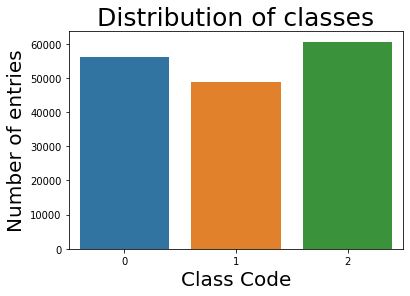

In [ ]:
sns.countplot(x = data_master['predict'])
plt.xlabel('Class Code', size = 20)
plt.ylabel('Number of entries', size = 20);
plt.title('Distribution of classes',size=25)
plt.show()

#### Seperating the labels from the features

In [ ]:
#features
X = data_master.drop(['predict','accn_x','accn_y','accn_z', 'timestamp'], 1)

#labels
Y = data_master['predict']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165816 entries, 0 to 10662
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   system_activated  165816 non-null  int64  
 1   accn_kf_x         165816 non-null  float64
 2   accn_kf_y         165816 non-null  float64
 3   accn_kf_z         165816 non-null  float64
 4   roll              165816 non-null  float64
 5   pitch             165816 non-null  float64
 6   yaw               165816 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 15.1 MB


#### Standardising the data before training the models
This is to ensure better convergence

In [ ]:
print('Before standardising \n', X)
print('-x'*50)

sc = StandardScaler()
X = sc.fit_transform(X)

print('After standardising\n', X)

Before standardising 
        system_activated  accn_kf_x  accn_kf_y  accn_kf_z   roll  pitch    yaw
0                     0      0.012      0.022      0.006 -1.487 -0.223 -0.373
1                     0      0.049      0.088      0.028 -1.652 -0.248 -0.415
2                     0      0.070      0.126      0.041 -1.652 -0.248 -0.415
3                     0      0.078      0.141      0.046 -1.652 -0.248 -0.415
4                     0      0.081      0.147      0.048 -1.652 -0.248 -0.415
...                 ...        ...        ...        ...    ...    ...    ...
10658                 1     -0.003     -0.004      0.012 -1.538  0.032  2.970
10659                 1      0.010     -0.010      0.009 -1.537  0.031  2.969
10660                 1     -0.011     -0.006     -0.008 -1.534  0.037  2.967
10661                 1      0.019     -0.007     -0.006 -1.534  0.039  2.966
10662                 1     -0.002      0.006     -0.012 -1.533  0.036  2.965

[165816 rows x 7 columns]
-x-x-x-x-x-x-x

#### Spliting the dataset into training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y.to_numpy(), test_size = 0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(132652, 7)
(33164, 7)
(132652,)
(33164,)


#### Logistic Regression

In [ ]:
#Initializing model
log_reg = LogisticRegression(C = 0.1)

#Training
log_reg.fit(x_train, y_train)

#Prediction
y_pred_log_reg = log_reg.predict(x_test)

#Classification report
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.39      0.49      0.44     11093
           1       0.39      0.18      0.25      9951
           2       0.39      0.47      0.42     12120

    accuracy                           0.39     33164
   macro avg       0.39      0.38      0.37     33164
weighted avg       0.39      0.39      0.38     33164



#### Support Vector Classifier - SVC
We are terminating this early here because of time constraint. The Lagrange optimation is taking quite a long time.

In [ ]:
#Initializing model
svc = SVC(max_iter=1250)

#Training
svc.fit(x_train, y_train)

#Prediction
y_pred_svc = svc.predict(x_test)

#Classification report
print(classification_report(y_test, y_pred_svc))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.36      0.44      0.40     11093
           1       0.25      0.32      0.28      9951
           2       0.37      0.22      0.27     12120

    accuracy                           0.32     33164
   macro avg       0.33      0.32      0.32     33164
weighted avg       0.33      0.32      0.32     33164



#### Random Forest - RF

In [ ]:
rf = RandomForestClassifier(n_estimators=150) 

#Training
rf.fit(x_train, y_train)

#Prediction
y_pred_rf = rf.predict(x_test)

#Classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     11093
           1       0.88      0.86      0.87      9951
           2       0.89      0.91      0.90     12120

    accuracy                           0.89     33164
   macro avg       0.89      0.88      0.88     33164
weighted avg       0.89      0.89      0.89     33164



#### K Nearest Neighbours - KNN

In [ ]:
#Initializing model
knn = KNeighborsClassifier(n_neighbors = 4) 

#Training
knn.fit(x_train, y_train)

#Prediction
y_pred_knn = knn.predict(x_test)

#Classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.61      0.75      0.68     11093
           1       0.68      0.61      0.64      9951
           2       0.73      0.64      0.68     12120

    accuracy                           0.67     33164
   macro avg       0.67      0.67      0.67     33164
weighted avg       0.68      0.67      0.67     33164



#### Multilayer Perceptron Classifier - MLPC

In [ ]:
#Initializing model
mlp = MLPClassifier()

#Training
mlp.fit(x_train, y_train)

#Prediction
y_pred_mlp = mlp.predict(x_test)

#Classification report
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     11093
           1       0.70      0.64      0.67      9951
           2       0.72      0.77      0.75     12120

    accuracy                           0.71     33164
   macro avg       0.71      0.70      0.70     33164
weighted avg       0.71      0.71      0.71     33164



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### Summary of accuracies of all models

In [ ]:
print(f'For Logistic Regression')
print(accuracy_score(y_test, y_pred_log_reg))

print(f'\nFor Support Vector Classifier')
print(accuracy_score(y_test, y_pred_svc))

print(f'\nFor Random Forest Classifier')
print(accuracy_score(y_test, y_pred_rf))

print(f'\nFor K Nearest Neigbours')
print(accuracy_score(y_test, y_pred_knn))

print(f'\nMultilayer Perceptron Classifier')
print(accuracy_score(y_test, y_pred_mlp))

For Logistic Regression
0.38994089977083585

For Support Vector Classifier
0.32095042817512964

For Random Forest Classifier
0.885870220721264

For K Nearest Neigbours
0.6682848872271138

Multilayer Perceptron Classifier
0.7084790736943674
